# Exploration numérique 1:

<br>

**Group-EN-2021 6:** Ismail Labiad & Mohamed Lakhnichi & Jean Assanoua <br>


## Question 1:
 On cherche à determiner les estimateurs $(\hat{\beta_{1}},\hat{\beta_{2}})$ en minimisant la fonction  
\begin{align}
S(\beta_{1},\beta_{2}) = \Vert \mathbf{X} - \beta_{1} \mathbf{1} - \beta_{2} \mathbf{t} \vert
\end{align}

On va procéder analytiquement, en cherchant le couple $(\beta_{1}, \beta_{2})$ en lequel s'annule le gradient de S: 
\begin{align}
\nabla S = 0
\end{align}

Tout calcul fait, on trouve un système de deux équations à deux inconnus:

\begin{cases}
n\bar{\mathbf{X}} - n\beta_{1} - n\beta_{2}\bar{\mathbf{t}} &=0      \\
\sum_{i=0}^{n} {t_{i} X_{i}} - n\beta_{1}\bar{\mathbf{t}} - \beta_{2}\sum_{i=0}^{n} {t_{i}^2} &=0 
\end{cases}  

En faisant la résolution de ce sytème linéaire, on trouve l'expression des deux estimateurs qu'on cherche:  
\begin{align}
 \hat{\beta_{1}} = \bar{\mathbf{X}} - \hat{\beta_{2}} \bar{t} \ \ et \ \ \hat{\beta_{2}}= \dfrac{\sum_{i=0}^{n} {(t_i - \bar{t}) X_i}}{\sum_{i=0}^{n} {(t_i - \bar{t})^2}} 
\end{align}



## Question 2:
 A présent, on cherche un intervalle de confiance de l'estimation de $\beta_{j}$ avec $j=1, 2$

Etant donné que $\dfrac{\hat{\beta_j} - \beta_j}{\hat{\sigma_j}}$ suit une loi de Student à (n −2) degres de liberté , en prenant $t_{n-2}(1-\alpha / 2)$ le quantile de ladite loi de niveau $1-\alpha /2$ on aura (la densité d'une loi de Student est bien paire) :

\begin{align}
\mathbb{P}_{\theta} \bigg( \bigg| \dfrac{\hat{\beta_j} - \beta_j}{\hat{\sigma_j}} \bigg| \leqslant t_{n-2}(1-\alpha / 2) \bigg) &= 1 - \alpha
\end{align}

On conclut immédiatement que: 
\begin{align}
\mathbb{P}_{\theta} ( \beta_j \in [\hat{\beta}_j - t_{n-2}(1-\alpha / 2)\hat{\alpha}_j , \hat{\beta}_j + t_{n-2}(1-\alpha / 2)\hat{\alpha}_j]) = 1 - \alpha
\end{align}

## Question 3 :
On commence par importer les modules nécessaires de python:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Puis, on importe les données qu'on va traiter

In [2]:
data = pd.read_csv('https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv', header= 1)

Il ne reste plus qu'à faire le tracé:

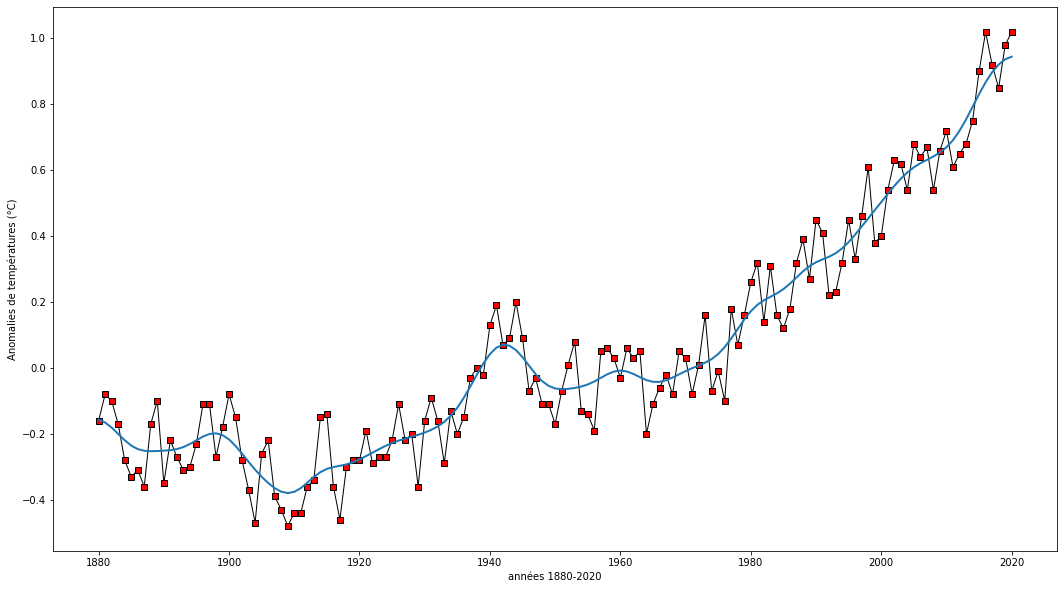

In [3]:
plt.figure(figsize= (18,10))

#On extrait les données qui nous interessent: les années et l'anomalie des températures annuelles
year_range = data[data["Year"] <= 2020]
year_range = year_range[year_range["Year"] >= 1880]
values = year_range[["Year", "J-D"]]

#On trace la courbe d'anomalie
plt.plot(range(1880, 2020+1), np.array(values["J-D"], dtype= np.float64), marker='s', color='black', linewidth= 1, markerfacecolor= 'red')
from scipy.ndimage.filters import gaussian_filter1d

#On trace une courbe lissée qui suit la courbe d'anomalie
ysmoothed = gaussian_filter1d(np.array(values["J-D"], dtype= np.float64), sigma=3)
plt.plot(range(1880, 2020+1), ysmoothed, linewidth= 2)

plt.xlabel("années 1880-2020")
plt.ylabel("Anomalies de températures (°C)")
plt.show()


## Question 4:



Toutes les données sont prêtes, on calcule directement les estimateurs $\hat{\beta_{1}},\hat{\beta_{2}} \ \ et \ \ \hat{\sigma}^2$

In [4]:
beta1= []
beta2= []
sigma_2 = []
i = 0
tab_ti = []
while i+30 <= len(values):
    t = np.array(values["Year"][i:i+30], dtype= np.int64)
    tab_ti.append(t)
    t_mean = np.mean(t)
    X = np.array(values["J-D"][i:i+30], dtype= np.float64)
    beta2.append( (np.sum((t-t_mean)*X) / np.sum((t-t_mean)**2)) )
    beta1.append((X.mean()-beta2[-1]*t_mean))
    sigma_2.append( np.sum((X-(beta1[-1]+beta2[-1]*t))**2) / (30-2) )
    i+= 10


## Question 5:

On trace maintenant les droites de régression linéaire en se basant sur les valeurs de $\hat{\beta_{1}} \ \ et \ \ \hat{\beta_{2}}$

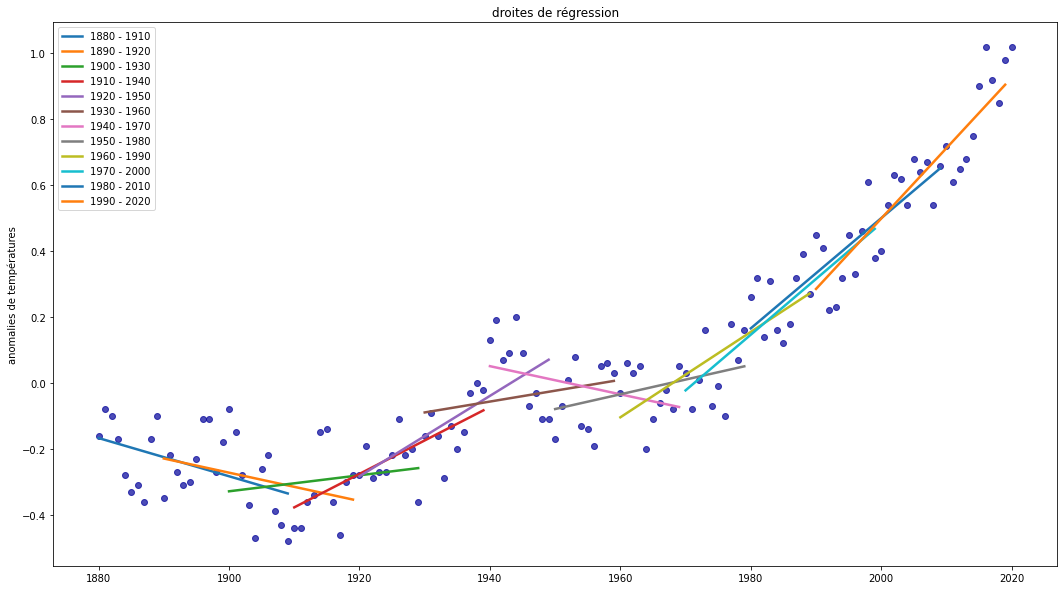

In [5]:
plt.figure(figsize= (18,10))
blue = np.array([0,0,1])
red = np.array([1,0,0])
plt.scatter(range(1880, 2020+1), np.array(values["J-D"], dtype= np.float64), color= [0,0,0.6,0.7])
for i in range(len(beta1)):
    plt.plot(tab_ti[i], beta1[i]+beta2[i]*tab_ti[i], linewidth= 2.5, label= f"{1880+10*i} - {1880+30+10*i}") #color=blue*(1-i/len(beta1)) + red*i/len(beta1))
plt.legend(loc='best')
plt.title("droites de régression")
plt.ylabel("anomalies de températures")
plt.show()

## Question 6:

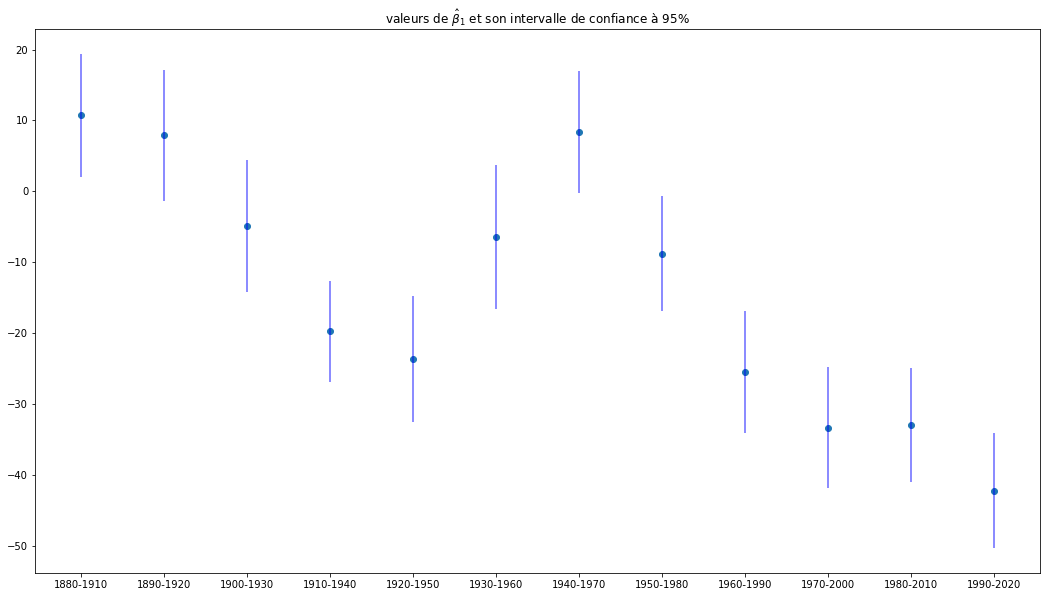

In [6]:
alpha = .05 #on choisit un niveau de confiance de 95%
student = stats.t(df= 30 - 2  )
quant = student.ppf(1-alpha/2) #quantile de niveau (1-alpha/2) de la loi student

tmp = np.array([np.sum((np.array(t) - np.mean(t))**2) for t in tab_ti])
sigma2 = (np.array(sigma_2) / tmp)**0.5
sigma1 = (np.array(sigma_2) * (np.sum(np.array(tab_ti)**2, axis= 1)/(30*tmp)))**0.5

#Tracé de beta_1
plt.figure(figsize= (18,10))
plt.vlines(np.linspace(1880, 2020, len(beta1)), beta1-quant*sigma1, beta1+quant*sigma1, color= [0,0,1,0.6])
plt.scatter(np.linspace(1880, 2020, len(beta1)), beta1)
plt.xticks(np.linspace(1880, 2020, len(beta1)), [f"{1880+10*i}-{1910+10*i}" for i in range(12)])
plt.title(r"valeurs de ${\hat\beta_{1}}$ et son intervalle de confiance à 95%")
plt.show()

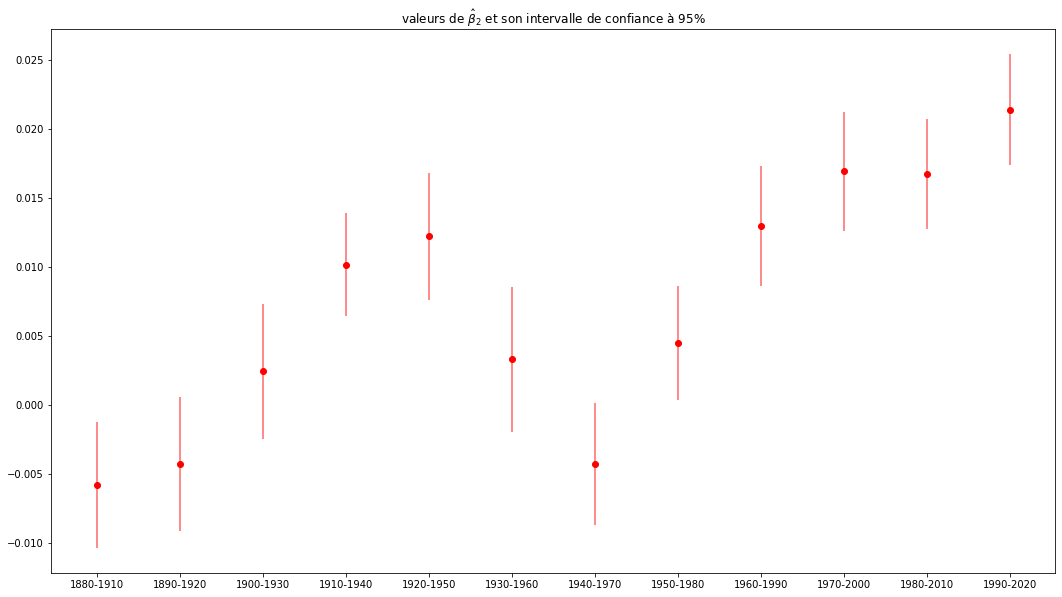

In [ ]:
#Tracé de beta_2
plt.figure(figsize= (18,10))
plt.vlines(np.linspace(1880, 2020, len(beta2)), beta2-quant*sigma2, beta2+quant*sigma2, color= [1,0,0,0.6])
plt.scatter(np.linspace(1880, 2020, len(beta2)), beta2, color='r')
plt.xticks(np.linspace(1880, 2020, len(beta1)), [f"{1880+10*i}-{1910+10*i}" for i in range(12)])
plt.title(r"valeurs de ${\hat\beta_{2}}$ et son intervalle de confiance à 95%")
plt.show()

## Question 7:

On remarque que les intervalles de confiances sont larges en comparaison avec les données qu'on essaye de prédir, ce qui nous indique que le choix d'un modèle gaussien pour les donnés n'est pas pertinent, ou qu'on aurrait peut être obtenu de meilleur résultats pour un autre modèle de l'espérance qui n'est pas linéaire en t.

De plus, on conclue en se basant sur le modèle de regression linéaire que les températures sont à la hausse dernièrement. Il s'agit alors du réchauffement climatique.




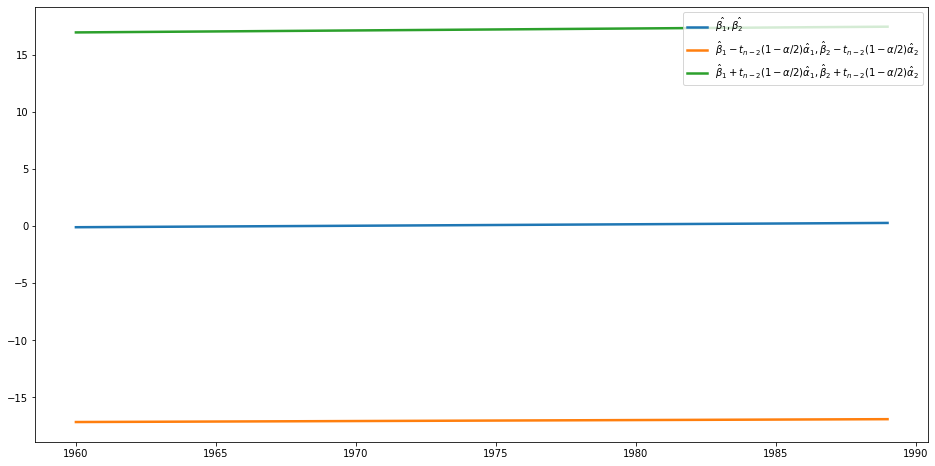

In [ ]:
# on représente les droites de régressions pour 1960-1990, avec beta1 et beta2 aux bords de l'interval de confiance
plt.figure(figsize= (16,8))
i = 8
a,b = beta2[i], beta1[i]
plt.plot(tab_ti[i], b+a*tab_ti[i], linewidth= 2.5, label= r"$\hat{\beta_{1}}, \hat{\beta_{2}}$")

a,b = beta2[i]-quant*sigma2[i], beta1[i]-quant*sigma1[i]
plt.plot(tab_ti[i], b+a*tab_ti[i], linewidth= 2.5, 
         label= r"$\hat{\beta}_1 - t_{n-2}(1-\alpha / 2)\hat{\alpha}_1, \hat{\beta}_2 - t_{n-2}(1-\alpha / 2)\hat{\alpha}_2 $")

a,b = beta2[i]+quant*sigma2[i], beta1[i]+quant*sigma1[i]
plt.plot(tab_ti[i], b+a*tab_ti[i], linewidth= 2.5, 
         label= r"$\hat{\beta}_1 + t_{n-2}(1-\alpha / 2)\hat{\alpha}_1, \hat{\beta}_2 + t_{n-2}(1-\alpha / 2)\hat{\alpha}_2 $")
plt.legend(loc='best')
plt.show()